# Predict energy produced by solar panels

### 1. Data overview

The dataset _Solar ZED_ consist of splited training and test data frames each containing 50 columns (training set has additional outcome values), first - an identifier, 3 categorical columns and 2 positional columns (latitude and longitude), 5 date columns and 39 numerical columns.

### 2. Load data

In [1]:
import pandas as pd
from IPython.display import display; pd.options.display.max_columns = None
import warnings; warnings.simplefilter('ignore')

train = pd.read_csv('./input/train.csv', sep=',')
test = pd.read_csv('./input/test.csv', sep=',')

display(train.describe(include='all'))
display(test.describe(include='all'))

,id,idsito,idmodel,idbrand,lat,lon,ageinmonths,anno,day,ora,data,temperatura_ambiente,irradiamento,pressure,windspeed,humidity,icon,dewpoint,windbearing,cloudcover,tempi,irri,pressurei,windspeedi,humidityi,dewpointi,windbearingi,cloudcoveri,dist,altitude,azimuth,altitudei,azimuthi,pcnm1,pcnm2,pcnm3,pcnm4,pcnm5,pcnm6,pcnm7,pcnm8,pcnm9,pcnm10,pcnm11,pcnm12,pcnm13,pcnm14,pcnm15,irr_pvgis_mod,irri_pvgis_mod,kwh
count,181603.000000,181603.000000,181603.000000,181603.000000,181603.000000,181603.000000,181603.000000,181603.000000,181603.000000,181603.000000,181603,181603.000000,181603.000000,181603.000000,181603.000000,181603.000000,181603.000000,181603.000000,181603.000000,181603.000000,181603.000000,181603.000000,181603.000000,181603.000000,181603.000000,181603.000000,181603.000000,181603.000000,181603.000000,181603.000000,181603.000000,181603.000000,181603.000000,181603.000000,181603.000000,181603.000000,181603.000000,181603.000000,181603.000000,181603.000000,181603.000000,181603.000000,181603.000000,181603.000000,181603.000000,181603.000000,181603.000000,181603.000000,181603.000000,181603.000000,181603.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6/4/2012 16:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,154061.584368,0.212504,0.239457,0.152576,0.448749,0.574158,0.301208,2012.350705,0.415888,0.489254,NaN,0.357676,0.112929,0.654256,0.079732,0.683789,0.498017,0.591404,0.459134,0.345873,0.124625,0.222636,0.000245,0.038594,0.064790,0.119847,0.345554,0.205266,0.489598,0.541485,0.446112,0.208971,0.372708,0.420935,0.349307,0.601875,0.518272,0.415561,0.499350,0.111288,0.407170,0.542918,0.629529,0.333176,0.758798,0.645844,0.488550,0.572263,0.180267,0.199450,0.167387
std,77880.280535,0.131447,0.169260,0.116226,0.037412,0.149998,0.375275,0.477192,0.269510,0.303695,NaN,0.164667,0.136825,0.253942,0.051732,0.179720,0.294961,0.096611,0.226229,0.245143,0.067321,0.012773,0.004397,0.004408,0.044351,0.014517,0.035397,0.029121,0.294608,0.178835,0.195547,0.151439,0.187500,0.200182,0.214131,0.215377,0.256412,0.252444,0.239749,0.220751,0.263052,0.259418,0.209076,0.214232,0.228070,0.202587,0.181275,0.200393,0.223757,0.057927,0.208760
min,1.000000,0.000000,0.000000,0.000000,0.415000,0.154000,0.000000,2012.000000,0.000000,0.000000,NaN,0.045000,0.000000,0.000000,0.000000,0.160000,0.000000,0.139000,0.000000,0.000000,0.009000,0.108000,0.000000,0.000000,0.034000,0.063000,0.000000,0.000000,0.000000,0.111000,0.128000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.137000,0.000000,0.000000,0.000000,-0.025000,0.000000
25%,104972.500000,0.100000,0.167000,0.083000,0.437000,0.620000,0.000000,2012.000000,0.195000,0.222000,NaN,0.212000,0.000000,0.748000,0.045000,0.540000,0.083000,0.517000,0.313000,0.220000,0.073000,0.217000,0.000000,0.037000,0.044000,0.114000,0.336000,0.196000,0.224044,0.414000,0.289000,0.096000,0.210000,0.377000,0.250000,0.551000,0.363000,0.331000,0.339000,0.031000,0.204000,0.527000,0.553000,0.257000,0.748000,0.614000,0.432000,0.612000,0.000000,0.158000,0.000000
50%,160724.000000,0.225000,0.208000,0.167000,0.437000,0.624000,0.125000,2012.000000,0.386000,0.500000,NaN,0.333000,0.040000,0.753000,0.071000,0.700000,0.667000,0.595000,0.488000,0.310000,0.112000,0.220000,0.000000,0.038000,0.044000,0.114000,0.336000,0.196000,0.480874,0.560000,0.411000,0.139000,0.297000,0.378000,0.377000,0.605000,0.531000,0.427000,0.493000,0.052000,0.412000,0.5

,id,idsito,idmodel,idbrand,lat,lon,ageinmonths,anno,day,ora,data,temperatura_ambiente,irradiamento,pressure,windspeed,humidity,icon,dewpoint,windbearing,cloudcover,tempi,irri,pressurei,windspeedi,humidityi,dewpointi,windbearingi,cloudcoveri,dist,altitude,azimuth,altitudei,azimuthi,pcnm1,pcnm2,pcnm3,pcnm4,pcnm5,pcnm6,pcnm7,pcnm8,pcnm9,pcnm10,pcnm11,pcnm12,pcnm13,pcnm14,pcnm15,irr_pvgis_mod,irri_pvgis_mod
count,54187.000000,54187.000000,54187.000000,54187.000000,54187.000000,54187.000000,54187.000000,54187.0,54187.000000,54187.000000,54187,54187.000000,54187.00000,54187.000000,54187.000000,54187.000000,54187.000000,54187.000000,54187.000000,54187.000000,54187.000000,54187.000000,54187.000000,54187.000000,54187.000000,54187.000000,54187.000000,54187.000000,54187.000000,54187.000000,54187.000000,54187.000000,54187.000000,54187.000000,54187.000000,54187.000000,54187.000000,54187.000000,54187.000000,54187.000000,54187.000000,54187.000000,54187.000000,54187.000000,54187.000000,54187.000000,54187.000000,54187.000000,54187.000000,54187.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8/4/2013 17:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,148149.447561,0.222085,0.253339,0.149813,0.452146,0.560927,0.358919,2013.0,0.699889,0.536013,NaN,0.426285,0.09634,0.637586,0.064466,0.686416,0.342441,0.652874,0.424764,0.403180,0.115266,0.219877,0.000209,0.038293,0.060655,0.117820,0.345312,0.209166,0.398428,0.562711,0.482975,0.193910,0.340404,0.427107,0.368703,0.613171,0.521182,0.419520,0.476326,0.123857,0.390560,0.517680,0.621339,0.291712,0.749950,0.664183,0.491788,0.566512,0.164882,0.187494
std,76599.937984,0.138389,0.181494,0.126687,0.039740,0.159920,0.383539,0.0,0.159928,0.303244,NaN,0.185903,0.12421,0.272700,0.042358,0.188365,0.318588,0.074932,0.241944,0.298666,0.045546,0.005219,0.002190,0.006203,0.032770,0.008412,0.029009,0.032885,0.293281,0.185635,0.197204,0.141839,0.161110,0.217795,0.214078,0.222329,0.252718,0.242652,0.236735,0.238163,0.265067,0.267976,0.222963,0.175135,0.231669,0.188160,0.192129,0.218128,0.211275,0.033037
min,5.000000,0.000000,0.000000,0.000000,0.415000,0.154000,0.000000,2013.0,0.477000,0.000000,NaN,0.182000,0.00000,0.000000,0.000000,0.230000,0.000000,0.375000,0.000000,0.000000,0.064000,0.206000,0.000000,0.025000,0.038000,0.079000,0.210000,0.078000,0.000000,0.114000,0.128000,0.022000,0.067000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.137000,0.000000,0.000000,0.000000,0.069000
25%,91904.500000,0.075000,0.125000,0.083000,0.437000,0.612000,0.063000,2013.0,0.551000,0.278000,NaN,0.212000,0.00000,0.751000,0.033000,0.530000,0.000000,0.621000,0.210000,0.310000,0.073000,0.216000,0.000000,0.037000,0.044000,0.114000,0.336000,0.196000,0.076503,0.441000,0.320000,0.095000,0.207000,0.377000,0.250000,0.551000,0.363000,0.331000,0.339000,0.031000,0.154000,0.483000,0.553000,0.252000,0.748000,0.614000,0.432000,0.612000,0.000000,0.158000
50%,150125.000000,0.250000,0.208000,0.083000,0.437000,0.622000,0.125000,2013.0,0.701000,0.556000,NaN,0.455000,0.02200,0.753000,0.056000,0.690000,0.083000,0.669000,0.450000,0.310000,0.108000,0.220000,0.000000,0.038000,0.044000,0.114000,0.336000,0.196000,0.377049,0.579000,0.464000,0.125000,0.264000,0.378000,0.377000,0.605000,0.531000,0.427000,0.484000,0.060000,0.412000,0.532000,0.619000,0.321000,0.760000,0.614000,0.473000,0.614000,0.048000,0.186000
75%,212973.000000,0.350000,0.375000,0.250000,0.440000,0.626000,0.844000,2013.

### 3. Prepare data

In [2]:
train2 = train.drop("data", axis=1).sample(frac=0.4)
test2 = test.drop("data", axis=1)

Xlen = len(train2)
Xtestlen = len(test2)

X_train = train2.iloc[:,1:49].values#.reshape(Xlen, -1)
X_test = test2.iloc[:,1:49].values#.reshape(Xtestlen, -1)
y_train = train2.iloc[:,-1].values
y_test = test2.iloc[:,-1].values

# display(pd.DataFrame(X_train).describe())
#display(pd.Series(y_train).describe())

print(X_train.shape)
print(pd.Series(y_train).shape)
print(X_test.shape)
print(pd.Series(y_test).shape)

(72641, 48)
(72641,)
(54187, 48)
(54187,)


### 4. Train

In [3]:
from sklearn.ensemble import RandomForestRegressor
import time

def learn(xtrain, ytrain):
    #Create and fit the model
    model = RandomForestRegressor(n_estimators=1000, max_features=5, n_jobs=4)

    #Fit the model using the training data
    start = time.time()
    model.fit(xtrain, ytrain)
    end = time.time()
    print("Learning time: {:.4f}s".format(end - start))
    
    return model
    
# model1 = learn(X_train, y_train)

### 5. Test

In [4]:
%matplotlib notebook
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import time

def predict(model, xtest, ytest):
    # Predict unseen data
    start = time.time()
    y_predicted = model.predict(xtest)
    end = time.time()
    print("Prediction time: {:.4f}s".format(end - start))

    print("RMSE = {:.4f}".format(mean_squared_error(y_test, y_predicted)))
    
    return y_predicted
    
# ypredicted = predict(model1, X_test, y_test)

# plt.plot(range(0, len(y_test)), y_test, label='Testing')
# plt.plot(range(0, len(ypredicted)), ypredicted, label='Predicted')
# plt.legend(loc='lower right')
# plt.show()

### 6. Feature selection

In [5]:
import numpy as np
from sklearn.feature_selection import VarianceThreshold
suport = VarianceThreshold(threshold=(.95 * (1 - .95))).fit(X_train).get_support()

X_train2 = X_train[:,suport]
y_train2 = y_train
X_test2 = X_test[:,suport]
y_test2 = y_test

model2 = learn(X_train2, y_train2)
ypredicted2 = predict(model2, X_test2, y_test2)

Learning time: 139.3542s
Prediction time: 7.1986s
RMSE = 0.0346


### 7. Comparison

<IPython.core.display.Javascript object>


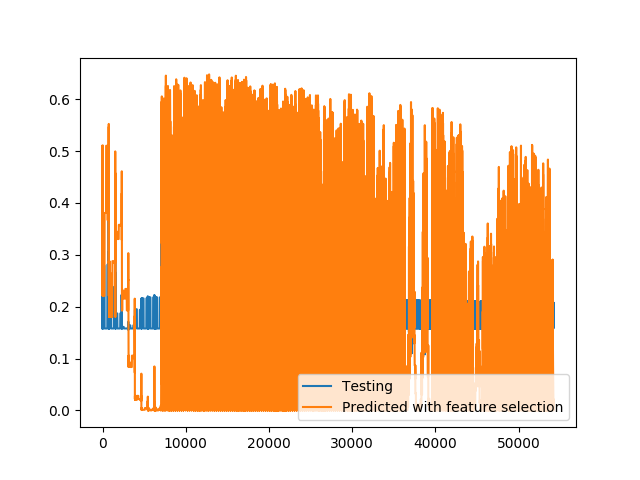

In [6]:
plt.plot(range(0, len(y_test)), y_test, label='Testing')
#plt.plot(range(0, len(ypredicted)), ypredicted, label='Predicted')
plt.plot(range(0, len(ypredicted2)), ypredicted2, label='Predicted with feature selection')
plt.legend(loc='lower right')
plt.show()

#### Save output

In [7]:
predicted_with_ids = {'Id': test2.iloc[:,0].values, 'Predicted': ypredicted2 }

pd.DataFrame.from_dict(predicted_with_ids).to_csv('submission.csv', encoding='utf-8', index=False)